### Решающие деревья и случайные леса

#### Практическое задание для самостоятельного выполнения

**Задание 1.**

1. Используя модуль _**datasets**_ библиотеки _**Scikit-learn**_ сгенерировать модельный набор данных для задачи многоклассовой классификации с двумя информативными признаками и числом классов, равным трем. Обеспечить воспроизводимость результатов.
2. Выполнить визуализацию сгенерированных облаков точек (точки, отображающие объекты разных классов, должны быть выведены разными цветами).
3. Выполнить разбиение набора данных, полученного в п. 1, на обучающую и тестовую выборки в соотношении 70/30.
4. Создать модель решающего дерева с параметрами по умолчанию (обеспечить только воспроизводимость результатов) и обучить ее на обучающей выборке.
5. Получить предсказания обученной модели для объектов тестовой выборки. Оценить качество классификации с помощью метрики _**accuracy**_ как на обучающей, так и на тестовой выборке; дать интерпретацию полученных оценок.
6. Изучить зависимость обобщающей способности модели от глубины дерева. Для этого выполнить следующие действия.
    * 6.1. Создать модель решающего дерева глубиной 1 и обучить ее на обучающей выборке. Получить предсказанные моделью метки классов для объектов обучающей и тестовой выборок. Оценить качество классификации с помощью метрики _**accuracy**_ на обучающей и тестовой выборках. <br>Выполнить визуализацию полученных результатов: изобразить на графиках разделяющие линии классов (залить области, относимые моделью к каждому из трех классов, разными цветами); на этих же графиках отобразить облака точек, представляющие объекты выборки. Выполнить такое построение отдельно для обучающей и тестовой выборки. В заголовках графиков вывести информацию о том, какая именно выборка визуализирована (обучающая или тестовая) и оценку качества классификации на этой выборке. 
    * 6.2. Создать модель решающего дерева глубиной 2 и выполнить с ней действия, описанные в п. 6.1. 
    * 6.3. Создать модель решающего дерева глубиной 3 и выполнить с ней действия, описанные в п. 6.1.
7. Проанализировать все результаты, полученные в п. 5 и 6. Сделать выводы. Создать отчет: описание и оценка качества каждой модели, выводы по результатам исследования.
8. Создать модель решающего дерева с ограничением на число объектов в листе (задать не более 3 объектов). Обучить эту модель на обучающей выборке. Получить предсказанные моделью метки классов для объектов обучающей и тестовой выборок. Оценить качество классификации с помощью метрики _**accuracy**_ на обучающей и тестовой выборках. Сопоставить результаты с полученными в п. 5 и 6, сделать выводы и добавить их в отчет.

---

1. Используя модуль _**datasets**_ библиотеки _**Scikit-learn**_ сгенерировать модельный набор данных для задачи многоклассовой классификации с двумя информативными признаками и числом классов, равным трем. Обеспечить воспроизводимость результатов.
* Using the _**datasets**_ module of the _**Scikit-learn**_ library, generate a model dataset for a multiclass classification problem with two informative features and three classes. Ensure reproducible results.

In [1]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=123)

# random_state determines random number generation for dataset creation
# pass an int for reproducible output across multiple function calls

# устанавливая фиксированный random_state мы из раза в раз будет получать одну 
# и ту же последовательность данных, то есть результаты будут воспроизводимы

---

2. Выполнить визуализацию сгенерированных облаков точек (точки, отображающие объекты разных классов, должны быть выведены разными цветами).
* Perform visualization of the generated point clouds (points representing objects of different classes should be displayed in different colors).

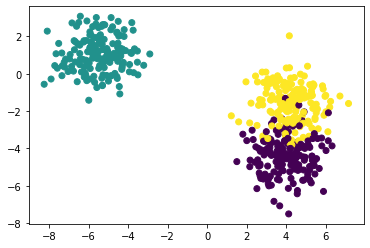

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y);

--- 

3. Выполнить разбиение набора данных, полученного в п. 1, на обучающую и тестовую выборки в соотношении 70/30.
* Split the data set obtained in step 1 into training and test samples in the ratio 70/30.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=143)

---

4. Создать модель решающего дерева с параметрами по умолчанию (обеспечить только воспроизводимость результатов) и обучить ее на обучающей выборке.
* Create a decision tree model with default parameters (ensure reproducibility only) and train it on the training set.

In [4]:
from sklearn.tree import DecisionTreeClassifier

table = {'method':[],'train_set':[],'test_set':[]}
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

---

5. Получить предсказания обученной модели для объектов тестовой выборки. Оценить качество классификации с помощью метрики _**accuracy**_ как на обучающей, так и на тестовой выборке; дать интерпретацию полученных оценок.
* Obtain trained model predictions for test set objects. Evaluate the quality of classification using the accuracy metric both on the training and test sets; give an interpretation of the obtained estimates.

In [5]:
from sklearn.metrics import accuracy_score

table['method'].append('dt()')

y_pred = dt.predict(X_train)
table['train_set'].append(accuracy_score(y_train,y_pred))

y_pred = dt.predict(X_test)
table['test_set'].append(accuracy_score(y_test,y_pred))

print('train accuracy =',table['train_set'][-1])
print('test accuracy =',table['test_set'][-1])

train accuracy = 1.0
test accuracy = 0.9533333333333334


Интерпрестанция:
* Точность на тестовой выборке оказалась чуть меньше, поскольку два класса судя по рисунку выше являются нелинейно-разделимы.
* The accuracy on the test sample turned out to be slightly less, since the two classes, judging by the figure above, are non-linearly separable.

---

6. Изучить зависимость обобщающей способности модели от глубины дерева. Для этого выполнить следующие действия.
    * 6.1. Создать модель решающего дерева глубиной 1 и обучить ее на обучающей выборке. Получить предсказанные моделью метки классов для объектов обучающей и тестовой выборок. Оценить качество классификации с помощью метрики _**accuracy**_ на обучающей и тестовой выборках....

* To study the dependence of the generalizing ability of the model on the depth of the tree. To do this, follow these steps.
    * 6.1. Create a decision tree model with a depth of 1 and train it on the training set. Get model-predicted class labels for training and test set objects. Evaluate the classification quality using the accuracy metric on the training and test sets....

In [6]:
dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(X_train,y_train)

table['method'].append('dt(max_depth=1)')

y_pred = dt1.predict(X_train)
table['train_set'].append(accuracy_score(y_train,y_pred))

y_pred = dt1.predict(X_test)
table['test_set'].append(accuracy_score(y_test,y_pred))

print('train accuracy =',table['train_set'][-1])
print('test accuracy =',table['test_set'][-1])

train accuracy = 0.6685714285714286
test accuracy = 0.6666666666666666


---

6. Изучить зависимость обобщающей способности модели от глубины дерева. Для этого выполнить следующие действия.
    * 6.1. .... Выполнить визуализацию полученных результатов: изобразить на графиках разделяющие линии классов (залить области, относимые моделью к каждому из трех классов, разными цветами); на этих же графиках отобразить облака точек, представляющие объекты выборки. Выполнить такое построение отдельно для обучающей и тестовой выборки. В заголовках графиков вывести информацию о том, какая именно выборка визуализирована (обучающая или тестовая) и оценку качества классификации на этой выборке.

* To study the dependence of the generalizing ability of the model on the depth of the tree. To do this, follow these steps.
    * 6.1. .... Perform visualization of the obtained results: draw the separating lines of classes on the graphs (fill in the areas attributed by the model to each of the three classes with different colors); on the same graphs, display point clouds representing the objects of the sample. Perform such a construction separately for the training and test samples. In the headings of the graphs, display information about which sample is visualized (training or test) and an assessment of the classification quality on this sample.

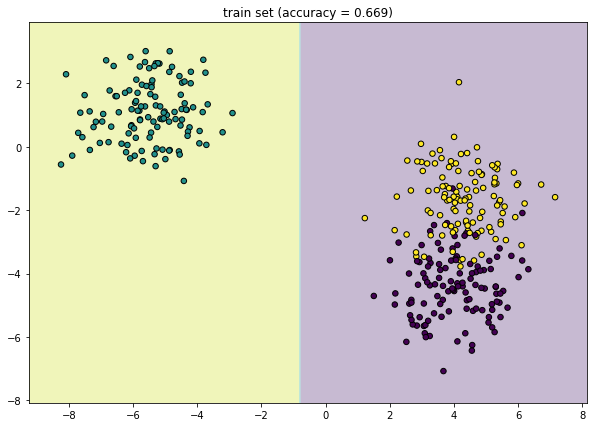

In [7]:
import numpy as np
import pandas as pd

# визуализация результатов

def ploty(X,y,model,title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor="k")
    ax.set_title(title)
    
ploty(X_train,y_train,dt1,'train set (accuracy = ' + str(round(table['train_set'][-1],3)) + ')')

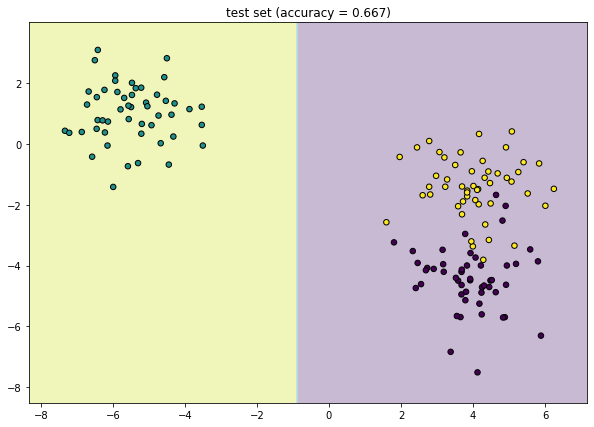

In [8]:
ploty(X_test,y_test,dt1,'test set (accuracy = ' + str(round(table['test_set'][-1],3)) + ')')

---

6. Изучить зависимость обобщающей способности модели от глубины дерева. Для этого выполнить следующие действия.
    * 6.2. Создать модель решающего дерева глубиной 2 и выполнить с ней действия, описанные в п. 6.1. 
    * 6.3. Создать модель решающего дерева глубиной 3 и выполнить с ней действия, описанные в п. 6.1.

* To study the dependence of the generalizing ability of the model on the depth of the tree. To do this, follow these steps.
    * 6.2. Create a decision tree model with a depth of 2 and perform the actions described in point 6.1 with it.
    * 6.3. Create a decision tree model with a depth of 3 and perform the actions described in point 6.1 with it.

train accuracy = 0.9457142857142857
test accuracy = 0.94


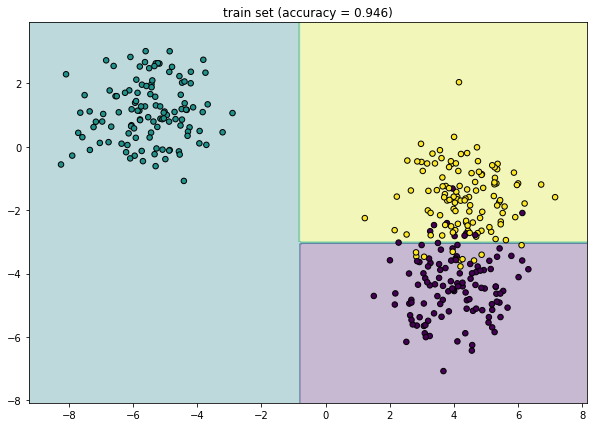

In [9]:
dt2 = DecisionTreeClassifier(max_depth=2)
dt2.fit(X_train,y_train)

table['method'].append('dt(max_depth=2)')

y_pred = dt2.predict(X_train)
table['train_set'].append(accuracy_score(y_train,y_pred))

y_pred = dt2.predict(X_test)
table['test_set'].append(accuracy_score(y_test,y_pred))

print('train accuracy =',table['train_set'][-1])
print('test accuracy =',table['test_set'][-1])

ploty(X_train,y_train,dt2,'train set (accuracy = ' + str(round(table['train_set'][-1],3)) + ')')

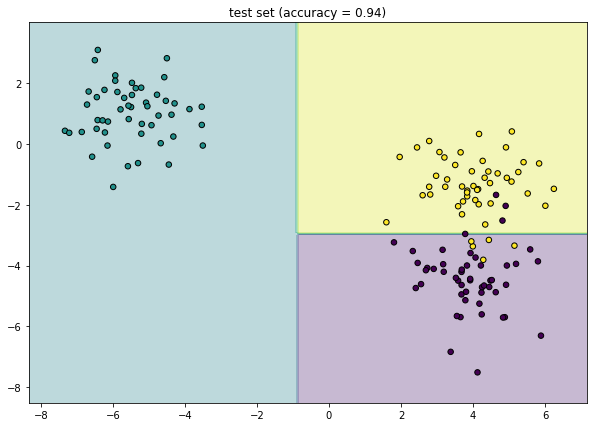

In [10]:
ploty(X_test,y_test,dt2,'test set (accuracy = ' + str(round(table['test_set'][-1],3)) + ')')

train accuracy = 0.9457142857142857
test accuracy = 0.94


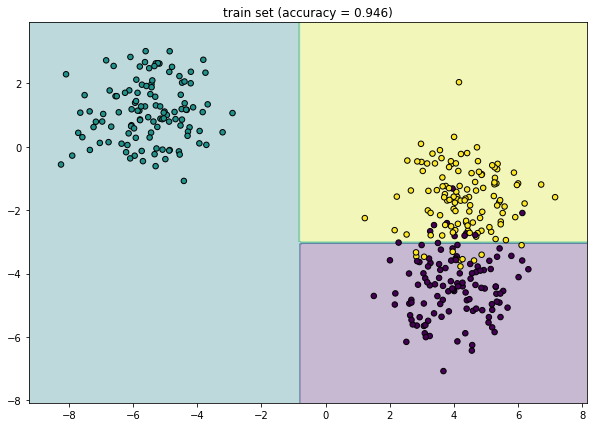

In [11]:
dt3 = DecisionTreeClassifier(max_depth=3)
dt3.fit(X_train,y_train)

table['method'].append('dt(max_depth=3)')

y_pred = dt3.predict(X_train)
table['train_set'].append(accuracy_score(y_train,y_pred))

y_pred = dt3.predict(X_test)
table['test_set'].append(accuracy_score(y_test,y_pred))

print('train accuracy =',table['train_set'][-1])
print('test accuracy =',table['test_set'][-1])

ploty(X_train,y_train,dt3,'train set (accuracy = ' + str(round(table['train_set'][-1],3)) + ')')

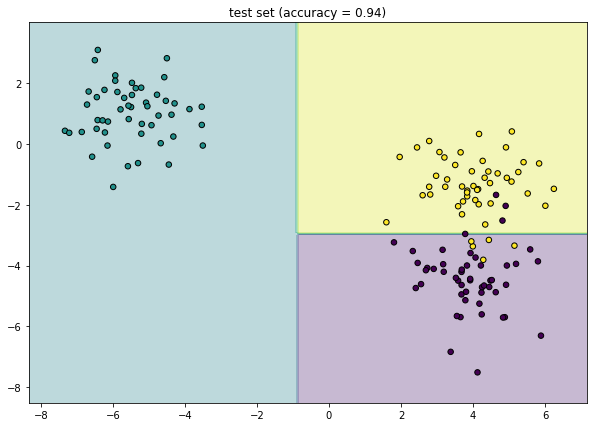

In [12]:
ploty(X_test,y_test,dt3,'test set (accuracy = ' + str(round(table['test_set'][-1],3)) + ')')

---

7. Проанализировать все результаты, полученные в п. 5 и 6. Сделать выводы. Создать отчет: описание и оценка качества каждой модели, выводы по результатам исследования.
* Analyze all the results obtained in steps 5 and 6. Draw conclusions. Create a report: description and assessment of the quality of each model, conclusions based on the results of the study.

In [13]:
df = pd.DataFrame(table)
df

,method,train_set,test_set
0,dt(),1.000000,0.953333
1,dt(max_depth=1),0.668571,0.666667
2,dt(max_depth=2),0.945714,0.940000
3,dt(max_depth=3),0.945714,0.940000


Выводы:
* Как показало тестирование глубины 1 не хватает, чтобы разделить набор из 3-х классов, а глубины 2 вполне достаточно и уже при глубине 3 не происходит никаких значительных изменений. Лучше будет не задавать свою глубину, а оставить её по умолчанию.
* As testing showed, depth 1 is not enough to separate the set of 3 classes, and depth 2 is quite enough and already at depth 3 there are no significant changes. It would be better not to set your own depth, but leave it by default.

--- 

8. Создать модель решающего дерева с ограничением на число объектов в листе (задать не более 3 объектов). Обучить эту модель на обучающей выборке. Получить предсказанные моделью метки классов для объектов обучающей и тестовой выборок. Оценить качество классификации с помощью метрики _**accuracy**_ на обучающей и тестовой выборках. Сопоставить результаты с полученными в п. 5 и 6, сделать выводы и добавить их в отчет.
* Create a decision tree model with a limit on the number of objects in a sheet (specify no more than 3 objects). Train this model on the training set. Get model-predicted class labels for training and test set objects. Evaluate the classification quality using the _**accuracy**_ metric on the training and test sets. Compare the results with those obtained in paragraphs 5 and 6, draw conclusions and add them to the report.

In [14]:
dtree = DecisionTreeClassifier(min_samples_leaf=3)
dtree.fit(X_train,y_train)

table['method'].append('dt(min_samples_leaf=3)')

y_pred = dt3.predict(X_train)
table['train_set'].append(accuracy_score(y_train,y_pred))

y_pred = dt3.predict(X_test)
table['test_set'].append(accuracy_score(y_test,y_pred))

print('train accuracy =',table['train_set'][-1])
print('test accuracy =',table['test_set'][-1])
df = pd.DataFrame(table)
df

train accuracy = 0.9457142857142857
test accuracy = 0.94


,method,train_set,test_set
0,dt(),1.000000,0.953333
1,dt(max_depth=1),0.668571,0.666667
2,dt(max_depth=2),0.945714,0.940000
3,dt(max_depth=3),0.945714,0.940000
4,dt(min_samples_leaf=3),0.945714,0.940000


Выводы:
* Изменение минимального количества объектов в листе на 3 никаких изменений в точности не дало.
* Changing the minimum number of objects in the sheet to 3 did not give any changes in accuracy

---

**Задание 2.**

Рассматривается (в упрощенном варианте) задача, размещенная на **kaggle**: https://www.kaggle.com/c/bioresponse. Задача состоит в том, чтобы по данным характеристикам молекулы определить, будет ли дан биологический ответ (biological response). Исходные данные: https://www.kaggle.com/c/bioresponse/data. Для анализа следует использовать данные из файла train.csv. Каждая строка описывает одну молекулу.

1. Импортировать данные из файла _**train.csv**_ в объект _Pandas DataFrame_ и вывести несколько первых записей (для контроля корректности импорта и получения представления о наборе данных). Вывести также размерность полученного датафрейма.
2. Значения целевого признака (наличие/отсутствие биологического ответа) находятся в столбце _Activity_. Отделить эти значения от остальных данных, сохранив их в отдельном объекте.
3. Определить соотношение классов в имеющемся наборе данных. Для этого вывести доли записей, относящихся к каждому из классов, в общем количестве записей. Сделать вывод о сбалансированности выборки.
4. Проанализировать возможности модели с деревьями небольшой глубины.
    * а. Создать случайный лес с 20 деревьями, каждое из которых имеет глубину не более 2. При настройке параметров модели включить использование подхода _**out-of-bag**_. Обучить полученную модель и вывести _**OOB**_ – оценку качества обученного алгоритма.
    * б. Создать аналогичные случайные леса с 50, 100, 150 и 200 деревьями. Обучить эти модели и для каждой из них получить оценку _**OOB**_. 
    * в. Построить график зависимости оценки качества случайного леса от количества базовых алгоритмов. Сделать выводы.
5. Проанализировать возможности моделей с деревьями большей глубины: выполнить все действия, перечисленные в п. 4, для случайных лесов с деревьями глубины 10.
6. Сопоставить результаты, полученные при выполнении пп. 4 и 5. Сделать выводы о предсказательной способности рассмотренных моделей.

---

1. Импортировать данные из файла _**train.csv**_ в объект _Pandas DataFrame_ и вывести несколько первых записей (для контроля корректности импорта и получения представления о наборе данных). Вывести также размерность полученного датафрейма.
* Import the data from the _**train.csv**_ file into the _Pandas DataFrame_ object and display the first few records (to check the correctness of the import and get an idea of the dataset). Output also the dimension of the received dataframe.

In [15]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
import pandas as pd

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/bioresponse_train.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# размерность

df.shape

(3751, 1777)

---

2. Значения целевого признака (наличие/отсутствие биологического ответа) находятся в столбце _Activity_. Отделить эти значения от остальных данных, сохранив их в отдельном объекте.
* Target trait values (presence/absence of biological response) are in the _Activity_ column. Separate these values from the rest of the data by storing them in a separate object.

In [18]:
activ = df['Activity']
df = df.drop(['Activity'],axis=1)
df.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


In [19]:
activ[:5]

0    1
1    1
2    1
3    1
4    0
Name: Activity, dtype: int64

---

3. Определить соотношение классов в имеющемся наборе данных. Для этого вывести доли записей, относящихся к каждому из классов, в общем количестве записей. Сделать вывод о сбалансированности выборки.
* Determine the ratio of classes in the existing data set. To do this, display the proportion of records belonging to each of the classes in the total number of records. Make a conclusion about the balance of the sample.

In [20]:
proportion = activ.value_counts()
shape = df.shape[0]

proportion /= shape
proportion

1    0.542255
0    0.457745
Name: Activity, dtype: float64

Выводы:
* Данных относящихся ко второму классу на 5% больше, чем к первому поэтому выборки можно считать вполне сбалансированными.
* There are 5% more data pertaining to the second class than to the first, so the samples can be considered quite balanced.

---

4. Проанализировать возможности модели с деревьями небольшой глубины.
    * а. Создать случайный лес с 20 деревьями, каждое из которых имеет глубину не более 2. При настройке параметров модели включить использование подхода _**out-of-bag**_. Обучить полученную модель и вывести _**OOB**_ – оценку качества обученного алгоритма.
    
* Analyze the possibilities of the model with trees of small depth.
    * а. Create a random forest with 20 trees, each of which has a depth of at most 2. When tuning the model parameters, enable the use of the _**out-of-bag**_ approach. Train the resulting model and derive _**OOB**_ – an estimate of the quality of the trained algorithm.

In [21]:
from sklearn.ensemble import RandomForestClassifier

X = df.values
y = activ.values

rt = RandomForestClassifier(n_estimators=20, max_depth=2, oob_score=True)
rt.fit(X,y)
print('OOB =', rt.oob_score_)

# Out-of-bag (OOB) score is a way of validating the Random forest model
# it is a method of measuring the prediction error of random forests
# https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

OOB = 0.6731538256464943


---

4. Проанализировать возможности модели с деревьями небольшой глубины.
    * б. Создать аналогичные случайные леса с 50, 100, 150 и 200 деревьями. Обучить эти модели и для каждой из них получить оценку _**OOB**_.
    
* Analyze the possibilities of the model with trees of small depth.
    * b. Create similar random forests with 50, 100, 150 and 200 trees. Train these models and for each of them get an _**OOB**_ score.

In [22]:
for size in [50,100,150,200]:
    rt = RandomForestClassifier(n_estimators=size, max_depth=2, oob_score=True)
    rt.fit(X,y)
    print('OOB(' + str(size) + ') =', rt.oob_score_)

OOB(50) = 0.700079978672354
OOB(100) = 0.6939482804585444
OOB(150) = 0.6902159424153559
OOB(200) = 0.6904825379898694


---

4. Проанализировать возможности модели с деревьями небольшой глубины.
    * в. Построить график зависимости оценки качества случайного леса от количества базовых алгоритмов. Сделать выводы.
    
* Analyze the possibilities of the model with trees of small depth.
    * c. Construct a graph of the dependence of the random forest quality assessment on the number of basic algorithms. Draw conclusions.

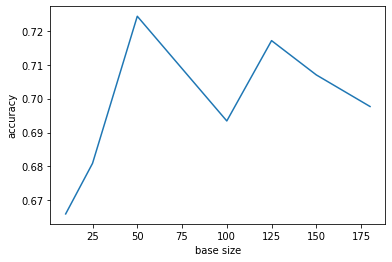

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

px = [10,25,50,100,125,150,180]
py = []
for size in px:
    rt = RandomForestClassifier(n_estimators=size, max_depth=2)
    rt.fit(X,y)
    py.append(accuracy_score(y,rt.predict(X)))
    
plt.plot(px,py)
plt.xlabel('base size')
plt.ylabel('accuracy');

Выводы:
* По графику можно сказать, что наиболее оптимальное количество деревьев 50.
* According to the graph, we can say that the most optimal number of trees is 50.

---

5. Проанализировать возможности моделей с деревьями большей глубины: выполнить все действия, перечисленные в п. 4, для случайных лесов с деревьями глубины 10.
* Analyze the possibilities of models with trees of greater depth: perform all the actions listed in step 4 for random forests with trees of depth 10.

OOB(20) = 0.7525993068515062
OOB(50) = 0.7848573713676353
OOB(100) = 0.7923220474540122
OOB(150) = 0.8000533191149027
OOB(200) = 0.7915222607304718


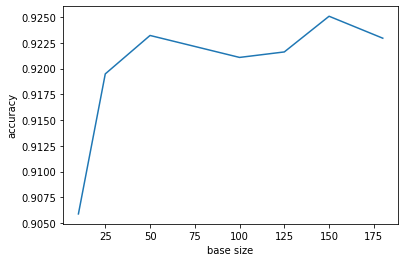

In [24]:
for size in [20,50,100,150,200]:
    rt = RandomForestClassifier(n_estimators=size, max_depth=10, oob_score=True)
    rt.fit(X,y)
    print('OOB(' + str(size) + ') =',rt.oob_score_)
    
py = []
for size in px:
    rt = RandomForestClassifier(n_estimators=size, max_depth=10)
    rt.fit(X,y)
    py.append(accuracy_score(y,rt.predict(X)))
    
plt.plot(px,py)
plt.xlabel('base size')
plt.ylabel('accuracy');

---

6. Сопоставить результаты, полученные при выполнении пп. 4 и 5. Сделать выводы о предсказательной способности рассмотренных моделей.
* Compare the results obtained when performing steps 4 and 5. Draw conclusions about the predictive ability of the considered models.

Выводы:

* Увеличение глубины деревьев до 10 дало значительный прирост в точности каждой модели и вместо 72% в среднем получили 92,5%.
* Increasing the depth of the trees to 10 gave a significant increase in the accuracy of each model and instead of 72%, the average received 92.5%.

---

**Задание 3.** (дополнительно).

Продолжение анализа ситуации, описанной в задании 5 по линейной регрессии (в файле 4_2_Линейная регрессия).

1. Выполнить (если это еще не сделано) пп. 1 – 7 задания 5 по линейной регрессии.
2. Для получения прогнозов вместо модели линейной регрессии использовать случайный лес с числом деревьев, равным 50, и глубиной каждого дерева, равной 20. Организовать раздельную обработку бинарных, числовых и категориальных признаков:
    * бинарные признаки не нужно преобразовывать (только отделить);
    * числовые признаки – отделить и отмасштабировать (метод _**StandardScaler**_ из модуля _**preprocessing**_);
    * категориальные признаки – отделить и применить бинарное кодирование (результат – булева матрица);
    * после обработки столбцы собрать вместе, причем после сборки порядок столбцов должен сохраняться (для этого можно использовать трансформер _**FeatureUnion**_);
    * для преобразованного набора данных создать модель «случайный леес». <br><u>Указание</u>: можно использовать Pipeline, созданный при выполнении задания 5, заменив в нем линейную регрессию на случайный лес.
3. Обучить случайный лес на обучающих данных. Оценить качество полученной модели на тестовых данных с помощью метрики _MAE_. Сравнить результат с результатом, полученным при выполнении задания 5.
4. Для получения наглядного представления об адекватности модели выполнить визуализацию: вывести облако точек в координатах «истинные значения целевой функции» – «предсказанные моделью значения». Проанализировать полученные результаты, сделать выводы. <br><u>Указание</u>: ясно, что при хорошей предсказательной способности модели облако точек должно располагаться вдоль биссектрисы первого координатного угла (прогнозируемые моделью результаты близки к истинным значениям целевой функции).
5. Сделать выводы.